### 1. Import Necessary Libraries

In [132]:
import pandas as pd
import numpy as np

### 2. Load the Data

In [133]:
survey_df = pd.read_excel('../data/SurveyResponses.xlsx')

### 3. Inspect the Data

In [134]:
survey_df.head()

,Timestamp,Are you a University Malaya Students?,What is your gender?,What is your current year of study?,How would you describe your general health?,How long have you been regularly participating in physical exercises?,What is the Intensity Level of the Aerobic Exercise activities you usually engage in?,How often do you engage in Aerobic Exercise activities?,"On average, how long is each Aerobic Exercise session?",What is the Intensity Level of the Anaerobic Exercise activities you usually engage in?,...,I found it difficult to relax,I felt downhearted and blue,I was intolerant of anything that kept me from getting on with what I was doing,I felt I was close to panic,I was unable to become enthusiastic about anything,I felt I wasn’t worth much as a person,I felt that I was rather touchy (easily offended; oversensitive; irritable),"I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)",I felt scared without any good reason,I felt that life was meaningless
0,2024-11-12 15:30:08.286,Yes,Male,Undergraduate,Very good,Less than 6 months,"Light (Light stretching, yoga)",1-2 times per week,Less than 30 minutes,"Moderate (Brisk walking, Steady cycling)",...,2,2,2,2,2,2,2,2,2,2
1,2024-11-12 21:23:32.498,Yes,Male,Undergraduate,Very good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",3-5 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",...,3,2,2,2,2,2,2,2,2,2
2,2024-11-12 21:50:46.328,Yes,Male,Undergraduate,Good,Less than 6 months,"Light (Light stretching, yoga)",Less than once per month,Less than 30 minutes,"Light (Light weightlifting, yoga, Pilates)",...,3,2,3,2,1,1,3,0,3,3
3,2024-11-13 11:24:47.968,Yes,Male,Undergraduate,Very good,6 months - 1 year,"Light (Light stretching, yoga)",1-2 times per week,30 - 60 minutes,"Light (Light weightlifting, yoga, Pilates)",...,2,2,1,2,2,2,3,2,2,2
4,2024-11-15 16:25:24.753,Yes,Male,Undergraduate,Fair,More than 2 years,"Light (Light stretching, yoga)",Daily,Less than 30 minutes,"Light (Light weightlifting, yoga, Pilates)",...,2,2,2,2,2,2,2,2,2,2


In [135]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 38 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype         
---  ------                                                                                                                               --------------  -----         
 0   Timestamp                                                                                                                            62 non-null     datetime64[ns]
 1   Are you a University Malaya Students?                                                                                                62 non-null     object        
 2   What is your gender?                                                                                                                 62 non-null     object        
 3   What is your current year of study?            

In [136]:
survey_df.isnull().sum()

Timestamp                                                                                                                              0
Are you a University Malaya Students?                                                                                                  0
What is your gender?                                                                                                                   0
What is your current year of study?                                                                                                    0
How would you describe your general health?                                                                                            0
How long have you been regularly participating in physical exercises?                                                                  0
What is the Intensity Level of the Aerobic Exercise activities you usually engage in?                                                  0
How often do you engage in Aerobic Exerci

In [137]:
# Trim all column headers to remove leading and trailing spaces
survey_df.columns = survey_df.columns.str.strip()

### 4. Process DASS-21 Scores <br/>
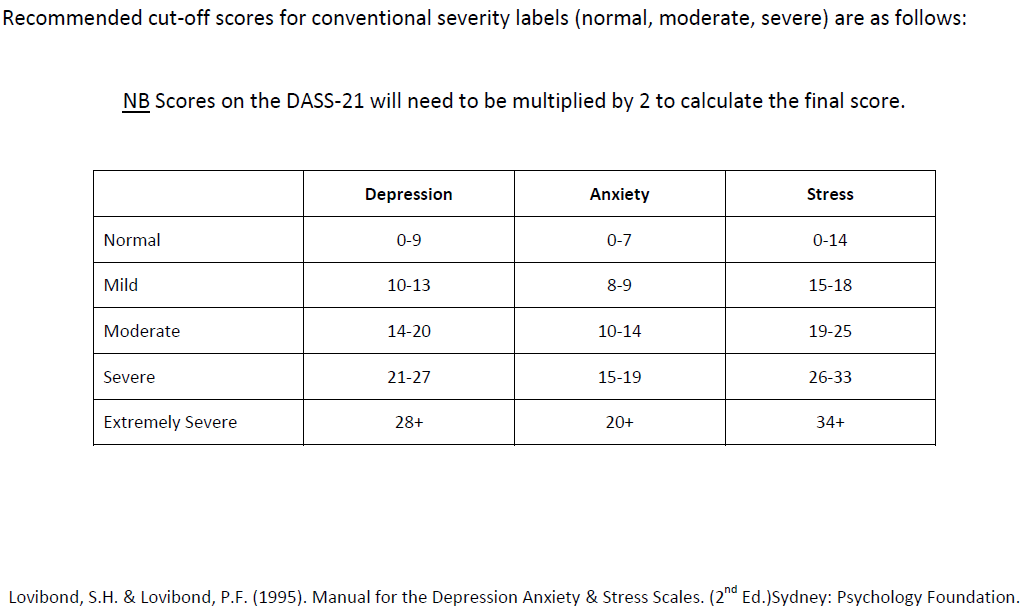

In [138]:
# 1. Identify the last 21 columns corresponding to the DASS-21 questions.
# Multiply each response by 2 to calculate the final scores
# Identify the last 21 columns corresponding to the DASS-21 questions
dass_columns = survey_df.columns[-21:]  # Select the last 21 columns

# Multiply only the selected columns by 2
survey_df.loc[:, dass_columns] = survey_df[dass_columns] * 2

In [139]:
dass_columns

Index(['I found it hard to wind down',
       'I was aware of the dryness in my mouth',
       'I couldn’t seem to experience any positive feelings at all',
       'I experienced breathing difficulty (e.g. excessively rapid breathing, breathlessness in the absence of physical exertion)',
       'I found it difficult to work up the initiative to do things',
       'I tended to over-react to situations',
       'I experienced trembling (e.g. in my hands)',
       'I felt that I was using a lot of nervous energy',
       'I was worried about situations in which I might panic and make a fool of myself',
       'I felt that I had nothing to look forward to',
       'I found myself getting agitated', 'I found it difficult to relax',
       'I felt downhearted and blue',
       'I was intolerant of anything that kept me from getting on with what I was doing',
       'I felt I was close to panic',
       'I was unable to become enthusiastic about anything',
       'I felt I wasn’t worth much a

In [143]:
# Group the scores into Depression, Anxiety, and Stress:

# Depression: Sum scores from specific questions (, Q3, Q5, Q10, Q13, Q16, Q17, Q21).
# Anxiety: Sum scores from specific questions (, Q2, Q4, Q7, Q9, Q15, Q19, Q20).
# Stress: Sum scores from specific questions (, Q1, Q6, Q8, Q11, Q12, Q14, Q18).

# Mapping of questions to categories
depression_questions = [
    "I couldn’t seem to experience any positive feelings at all",
    "I found it difficult to work up the initiative to do things",
    "I felt that I had nothing to look forward to",
    "I felt downhearted and blue",
    "I was unable to become enthusiastic about anything",
    "I felt I wasn’t worth much as a person",
    "I felt scared without any good reason"
]

anxiety_questions = [
    "I was aware of the dryness in my mouth",
    "I experienced breathing difficulty (e.g. excessively rapid breathing, breathlessness in the absence of physical exertion)",
    "I experienced trembling (e.g. in my hands)",
    "I was worried about situations in which I might panic and make a fool of myself",
    "I felt I was close to panic",
    "I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)",
    "I felt scared without any good reason"
]

stress_questions = [
    "I found it hard to wind down",
    "I tended to over-react to situations",
    "I felt that I was using a lot of nervous energy",
    "I found myself getting agitated",
    "I found it difficult to relax",
    "I was intolerant of anything that kept me from getting on with what I was doing",
    "I felt that I was rather touchy (easily offended; oversensitive; irritable)"
]

# Calculate scores for each category
survey_df['Depression'] = survey_df[depression_questions].sum(axis=1)
survey_df['Anxiety'] = survey_df[anxiety_questions].sum(axis=1)
survey_df['Stress'] = survey_df[stress_questions].sum(axis=1)

In [144]:
# Severity Mapping Function
# This function will assign severity labels based on cut-off scores.

def get_severity(score, category):
    if category == 'Depression':
        if score <= 9:
            return 'Normal'
        elif score <= 13:
            return 'Mild'
        elif score <= 20:
            return 'Moderate'
        elif score <= 27:
            return 'Severe'
        else:
            return 'Extremely Severe'
    elif category == 'Anxiety':
        if score <= 7:
            return 'Normal'
        elif score <= 9:
            return 'Mild'
        elif score <= 14:
            return 'Moderate'
        elif score <= 19:
            return 'Severe'
        else:
            return 'Extremely Severe'
    elif category == 'Stress':
        if score <= 14:
            return 'Normal'
        elif score <= 18:
            return 'Mild'
        elif score <= 25:
            return 'Moderate'
        elif score <= 33:
            return 'Severe'
        else:
            return 'Extremely Severe'

In [145]:
## Apply Severity Mapping

survey_df['Depression_Severity'] = survey_df['Depression'].apply(lambda x: get_severity(x, 'Depression'))
survey_df['Anxiety_Severity'] = survey_df['Anxiety'].apply(lambda x: get_severity(x, 'Anxiety'))
survey_df['Stress_Severity'] = survey_df['Stress'].apply(lambda x: get_severity(x, 'Stress'))

In [146]:
# Display the resulting DataFrame with the calculated scores and severities
survey_df[['How often do you engage in  Anaerobic Exercise activities?','Depression', 'Depression_Severity', 'Anxiety', 'Anxiety_Severity', 'Stress', 'Stress_Severity']]

,How often do you engage in Anaerobic Exercise activities?,Depression,Depression_Severity,Anxiety,Anxiety_Severity,Stress,Stress_Severity
0,1-2 times per week,28,Extremely Severe,28,Extremely Severe,28,Severe
1,1-2 times per week,24,Severe,24,Extremely Severe,28,Severe
2,Less than once per month,20,Moderate,18,Severe,34,Extremely Severe
3,Daily,30,Extremely Severe,26,Extremely Severe,24,Moderate
4,Daily,28,Extremely Severe,28,Extremely Severe,28,Severe
...,...,...,...,...,...,...,...
57,Less than once per month,12,Mild,12,Moderate,14,Normal
58,1-2 times per week,12,Mild,6,Normal,16,Mild
59,3-5 times per week,18,Moderate,24,Extremely Severe,18,Mild
60,1-2 times per month,24,Severe,36,Extremely Severe,32,Severe


### 5. Feature Processing

In [147]:
# Define mapping dictionaries for each question
sleep_quality_mapping = {
    1: "Very Poor",
    2: "Poor",
    3: "Fair",
    4: "Good",
    5: "Excellent"
}

academic_workload_mapping = {
    1: "Very Low",
    2: "Low",
    3: "Moderate",
    4: "High",
    5: "Very High"
}

# Apply the mappings to the corresponding columns
survey_df['How would you rate your average sleep quality per night?'] = survey_df['How would you rate your average sleep quality per night?'].map(sleep_quality_mapping)
survey_df['How would you rate your current academic workload or pressure on a scale of 1-5?'] = survey_df['How would you rate your current academic workload or pressure on a scale of 1-5?'].map(academic_workload_mapping)

### 6. Feature Selection

In [152]:
# List of DASS-21 questionnaire columns
dass_questions = [
    'I found it hard to wind down',
    'I was aware of the dryness in my mouth',
    'I couldn’t seem to experience any positive feelings at all',
    'I experienced breathing difficulty (e.g. excessively rapid breathing, breathlessness in the absence of physical exertion)',
    'I found it difficult to work up the initiative to do things',
    'I tended to over-react to situations',
    'I experienced trembling (e.g. in my hands)',
    'I felt that I was using a lot of nervous energy',
    'I was worried about situations in which I might panic and make a fool of myself',
    'I felt that I had nothing to look forward to',
    'I found myself getting agitated',
    'I found it difficult to relax',
    'I felt downhearted and blue',
    'I was intolerant of anything that kept me from getting on with what I was doing',
    'I felt I was close to panic',
    'I was unable to become enthusiastic about anything',
    'I felt I wasn’t worth much as a person',
    'I felt that I was rather touchy (easily offended; oversensitive; irritable)',
    'I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)',
    'I felt scared without any good reason',
    'I felt that life was meaningless'
]

# List of columns to remove
columns_to_remove = [
    'Timestamp',
    'Are you a University Malaya Students?',
    'What is your current year of study?',
    'Depression',
    'Anxiety',
    'Stress'
] + dass_questions  # Add the DASS-21 questions to the list

# Drop the columns from the DataFrame
survey_df_cleaned = survey_df.drop(columns=columns_to_remove)

# Verify the columns in the cleaned DataFrame
survey_df_cleaned.columns

Index(['What is your gender?', 'How would you describe your general health?',
       'How long have you been regularly participating in physical exercises?',
       'What is the Intensity Level of the Aerobic Exercise activities you usually engage in?',
       'How often do you engage in Aerobic Exercise activities?',
       'On average, how long is each Aerobic Exercise session?',
       'What is the Intensity Level of the Anaerobic Exercise activities you usually engage in?',
       'How often do you engage in  Anaerobic Exercise activities?',
       'On average, how long is each Anaerobic Exercise session?',
       'How would you rate your average sleep quality per night?',
       'How would you rate your current academic workload or pressure on a scale of 1-5?',
       'How often do you feel overwhelmed by academic workload?',
       'What are the primary challenges you face when exercising regularly?',
       'How likely are you to prioritize physical exercise over other responsib

In [153]:
survey_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   What is your gender?                                                                     62 non-null     object
 1   How would you describe your general health?                                              62 non-null     object
 2   How long have you been regularly participating in physical exercises?                    62 non-null     object
 3   What is the Intensity Level of the Aerobic Exercise activities you usually engage in?    62 non-null     object
 4   How often do you engage in Aerobic Exercise activities?                                  62 non-null     object
 5   On average, how long is each Aerobic Exercise session?                   

In [154]:
survey_df_cleaned

,What is your gender?,How would you describe your general health?,How long have you been regularly participating in physical exercises?,What is the Intensity Level of the Aerobic Exercise activities you usually engage in?,How often do you engage in Aerobic Exercise activities?,"On average, how long is each Aerobic Exercise session?",What is the Intensity Level of the Anaerobic Exercise activities you usually engage in?,How often do you engage in Anaerobic Exercise activities?,"On average, how long is each Anaerobic Exercise session?",How would you rate your average sleep quality per night?,How would you rate your current academic workload or pressure on a scale of 1-5?,How often do you feel overwhelmed by academic workload?,What are the primary challenges you face when exercising regularly?,How likely are you to prioritize physical exercise over other responsibilities?,Depression_Severity,Anxiety_Severity,Stress_Severity
0,Male,Very good,Less than 6 months,"Light (Light stretching, yoga)",1-2 times per week,Less than 30 minutes,"Moderate (Brisk walking, Steady cycling)",1-2 times per week,Less than 30 minutes,Good,High,Rarely,Lack of motivation,Very likely,Extremely Severe,Extremely Severe,Severe
1,Male,Very good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",3-5 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",1-2 times per week,Less than 30 minutes,Fair,Moderate,Sometimes,Academic commitments,Somewhat likely,Severe,Extremely Severe,Severe
2,Male,Good,Less than 6 months,"Light (Light stretching, yoga)",Less than once per month,Less than 30 minutes,"Light (Light weightlifting, yoga, Pilates)",Less than once per month,Less than 30 minutes,Poor,Very High,Often,Lack of motivation,Somewhat unlikely,Moderate,Severe,Extremely Severe
3,Male,Very good,6 months - 1 year,"Light (Light stretching, yoga)",1-2 times per week,30 - 60 minutes,"Light (Light weightlifting, yoga, Pilates)",Daily,Less than 30 minutes,Good,High,Sometimes,Lack of time,Somewhat likely,Extremely Severe,Extremely Severe,Moderate
4,Male,Fair,More than 2 years,"Light (Light stretching, yoga)",Daily,Less than 30 minutes,"Light (Light weightlifting, yoga, Pilates)",Daily,Less than 30 minutes,Fair,High,Often,Lack of motivation,Neutral,Extremely Severe,Extremely Severe,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Female,Very good,1-2 years,"Moderate (Brisk walking, Steady cycling)",Less than once per month,30 - 60 minutes,"Light (Light weightlifting, yoga, Pilates)",Less than once per month,30 - 60 minutes,Good,High,Often,Lack of time,Somewhat likely,Mild,Moderate,Normal
58,Male,Very good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",1-2 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",1-2 times per week,30 - 60 minutes,Poor,High,Often,Lack of time,Neutral,Mild,Normal,Mild
59,Female,Good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",3-5 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",3-5 times per week,Less than 30 minutes,Fair,High,Often,No access to facilities,Neutral,Moderate,Extremely Severe,Mild
60,Female,Good,Less than 6 months,"Moderate (Brisk walking, Steady cycling)",1-2 times per month,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",1-2 times per month,Less than 30 minutes,Fair,Moderate,Sometimes,Lack of motivation,Neutral,Severe,Extremely Severe,Severe


### 7. Rename Columns

In [155]:
# Rename columns for clarity
survey_df_cleaned.rename(columns={
    'What is your gender?': 'Gender', 
    'How would you describe your general health?': 'General_Health',
    'How long have you been regularly participating in physical exercises?': 'Exercise_Duration',
    'What is the Intensity Level of the Aerobic Exercise activities you usually engage in?': 'Aerobic_Exercise_Intensity',
    'How often do you engage in Aerobic Exercise activities?': 'Aerobic_Exercise_Frequency',
    'On average, how long is each Aerobic Exercise session?': 'Aerobic_Exercise_Duration',
    'What is the Intensity Level of the Anaerobic Exercise activities you usually engage in?': 'Anaerobic_Exercise_Intensity',
    'How often do you engage in  Anaerobic Exercise activities?': 'Anaerobic_Exercise_Frequency',
    'On average, how long is each Anaerobic Exercise session?': 'Anaerobic_Exercise_Duration',
    'How would you rate your average sleep quality per night?': 'Sleep_Quality',
    'How would you rate your current academic workload or pressure on a scale of 1-5?': 'Academic_Workload',
    'How often do you feel overwhelmed by academic workload?': 'Overwhelmed_By_Workload',
    'What are the primary challenges you face when exercising regularly?': 'Exercise_Challenges',
    'How likely are you to prioritize physical exercise over other responsibilities?': 'Exercise_Prioritization',
    'Depression_Severity': 'Depression',
    'Anxiety_Severity': 'Anxiety',
    'Stress_Severity': 'Stress'
}, inplace=True)

# Display the updated columns
print(survey_df_cleaned.columns)

Index(['Gender', 'General_Health', 'Exercise_Duration',
       'Aerobic_Exercise_Intensity', 'Aerobic_Exercise_Frequency',
       'Aerobic_Exercise_Duration', 'Anaerobic_Exercise_Intensity',
       'Anaerobic_Exercise_Frequency', 'Anaerobic_Exercise_Duration',
       'Sleep_Quality', 'Academic_Workload', 'Overwhelmed_By_Workload',
       'Exercise_Challenges', 'Exercise_Prioritization', 'Depression',
       'Anxiety', 'Stress'],
      dtype='object')


In [156]:
survey_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        62 non-null     object
 1   General_Health                62 non-null     object
 2   Exercise_Duration             62 non-null     object
 3   Aerobic_Exercise_Intensity    62 non-null     object
 4   Aerobic_Exercise_Frequency    62 non-null     object
 5   Aerobic_Exercise_Duration     62 non-null     object
 6   Anaerobic_Exercise_Intensity  62 non-null     object
 7   Anaerobic_Exercise_Frequency  62 non-null     object
 8   Anaerobic_Exercise_Duration   62 non-null     object
 9   Sleep_Quality                 62 non-null     object
 10  Academic_Workload             62 non-null     object
 11  Overwhelmed_By_Workload       62 non-null     object
 12  Exercise_Challenges           62 non-null     object
 13  Exercise_Prioritizatio

### 8. Export data for analysis

In [157]:
# Export the cleaned DataFrame to a CSV file
survey_df_cleaned.to_csv('../data/cleaned_survey_data.csv', index=False)

print("Data exported successfully to 'cleaned_survey_data.csv'.")

Data exported successfully to 'cleaned_survey_data.csv'.
